In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
print(tf.__version__)
print(np.__version__)
print(keras.__version__)

2.17.1
1.26.4
3.5.0


In [4]:
cifar10 = tf.keras.datasets.cifar10

# load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
from sklearn.model_selection import train_test_split
train_images,validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=0)

# Check shape
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print('Validation Images Shape: ', validation_images.shape)
print('Validation Labels Shape: ', validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000, 1)
Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


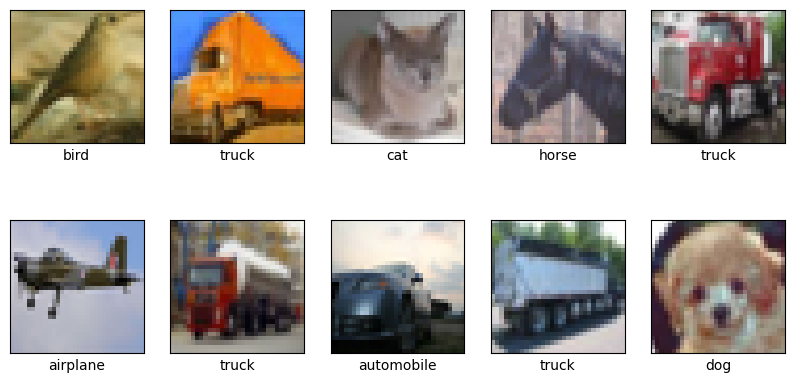

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
np.unique(train_labels, axis=0)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]], dtype=uint8)

In [8]:
train_labels[1][0]

9

In [9]:
# Normalization
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

In [10]:
# Print shape
print("Train images shape:", train_images.shape)
print("Validation images shape:", validation_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (45000, 32, 32, 3)
Validation images shape: (5000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
validation_labels = to_categorical(validation_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [12]:
# ANN Model 
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.2535 - loss: 2.0439 - val_accuracy: 0.3502 - val_loss: 1.7822
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.3758 - loss: 1.7261 - val_accuracy: 0.4176 - val_loss: 1.6201
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4164 - loss: 1.6258 - val_accuracy: 0.4200 - val_loss: 1.6198
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.4429 - loss: 1.5570 - val_accuracy: 0.4388 - val_loss: 1.5336
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4629 - loss: 1.5017 - val_accuracy: 0.4044 - val_loss: 1.6466
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4691 - loss: 1.4845 - val_accuracy: 0.4488 - val_loss: 1.5277
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.4836 - loss: 1.4340 - val_accuracy: 0.4682 - val_loss: 1.4746
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.4998 - loss: 1.3970 - 

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 3s - 8ms/step - accuracy: 0.4941 - loss: 1.5315
Test Accuracy: 49.41%


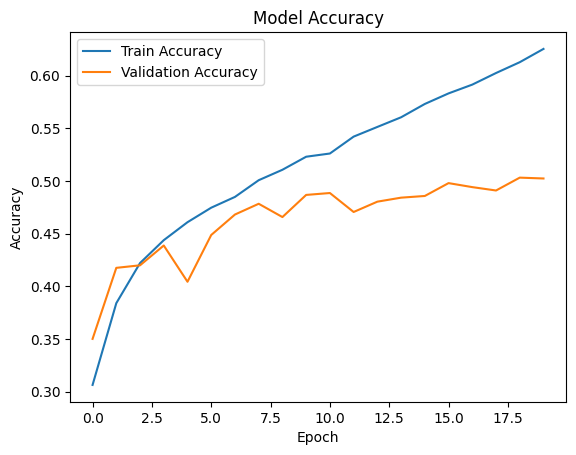

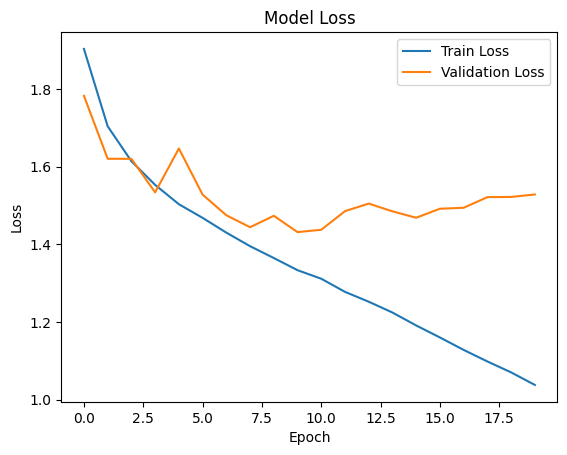

In [15]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
